# **Assignment 1: Kaggle Competition**



## Kaggle Competition: NBA Career Prediction

In the National Basketball Association (NBA), a rookie is any player who has never played a game in the NBA until that year. At the end of the season the NBA awards the best rookie with the NBA Rookie of the Year Award.

Moving to the NBA league is a big deal for any basketball player. Sports commentators and fans are very excited to follow the start of their careers and guess how they will perform in the future.

You are tasked to build a model that will predict if a rookie player will last at least five years in the league based on his stats.

The metric used to assess model performance is AUROC (Area Under ROC).

The steps are:
1.   Setup Repository
2.   Load and Explore Dataset
3.   Prepare Data
4.   Split Dataset
5.   Baseline Model
6.   Modelling
7.   Push Changes


### 1. Setup Repository

**[1.1]** Go to a folder of your choice on your computer (where you store projects)

In [ ]:
# Go to a folder of your choice on your computer (where you store projects)
cd ~/UTS/

**[1.2]** Copy the cookiecutter data science template

In [ ]:
cookiecutter -c v1 https://github.com/drivendata/cookiecutter-data-science

Follow the prompt (name the project and repo adv_dsi)

**[1.3]** Go inside the created folder `adv_dsi`

In [ ]:
cd adv_dsi

**[1.4]** Initialise the repo

In [ ]:
git init
git add --all
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/bonhxh/adv_dsi.git
git push -u origin main

**[1.9]** Create a new git branch called `data_prep`

In [ ]:
git checkout -b data_prep

**[1.10]** Download the dataset into the folder data/raw

**[1.11]** Navigate the folder `notebooks` and create a new jupyter notebook called `bonheur_sorn-49371-week1_nba_prediction.ipynb`

**[1.12]** Install requirements

In [ ]:
pip install -r requirements.txt

**[1.13]** Imports

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from ydata_profiling import ProfileReport

warnings.filterwarnings("ignore")

import os, sys
cwd = os.getcwd()
sys.path.append(os.path.join(cwd, "../"))

from src.data.sets import save_sets
from src.models.performance import print_reg_perf, plot_cf

### 2.   Load and Explore Dataset

**[2.1]** Load the dataset into dataframe called df

In [75]:
df_train_name = "NBA_train"
df_test_name = "NBA_test"

df_train = pd.read_csv(f"../data/raw/{df_train_name}.csv")
df_test = pd.read_csv(f"../data/raw/{df_test_name}.csv")

**[2.2]** Display the first 5 rows of df

In [11]:
df_train.head()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,3799,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,...,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,3800,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,...,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,3801,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,...,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,3802,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,...,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,3803,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,...,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1


**[2.3]** Display the dimensions (shape) of df

In [12]:
df_train.shape

(8000, 21)

**[2.4]** Display the summary (info) of df

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           8000 non-null   int64  
 1   GP           8000 non-null   int64  
 2   MIN          8000 non-null   float64
 3   PTS          8000 non-null   float64
 4   FGM          8000 non-null   float64
 5   FGA          8000 non-null   float64
 6   FG%          8000 non-null   float64
 7   3P Made      8000 non-null   float64
 8   3PA          8000 non-null   float64
 9   3P%          8000 non-null   float64
 10  FTM          8000 non-null   float64
 11  FTA          8000 non-null   float64
 12  FT%          8000 non-null   float64
 13  OREB         8000 non-null   float64
 14  DREB         8000 non-null   float64
 15  REB          8000 non-null   float64
 16  AST          8000 non-null   float64
 17  STL          8000 non-null   float64
 18  BLK          8000 non-null   float64
 19  TOV   

**[2.5]** Display the descriptive statistics of df


In [14]:
df_train.describe()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,7798.50000,62.777875,18.576662,7.267088,2.807037,6.231212,44.608900,0.264525,0.816562,19.583700,...,1.947788,71.365825,1.077838,2.168500,3.245300,1.624513,0.648687,0.245212,1.257763,0.833625
std,2309.54541,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,16.003155,...,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,3799.00000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,-38.500000,...,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,5798.75000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,8.400000,...,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,7798.50000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,19.500000,...,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,9798.25000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,30.600000,...,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,11798.00000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,82.100000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


### 3. Prepare Data

**[3.1]** Exploratory Data Analysis (EDA)

Generate data profile

In [15]:
profile = ProfileReport(df_train)

Save to file

In [ ]:
profile.to_file(f"../reports/{df_train_name}-profile.html")

**[3.2]** Create a copy of df and save it into a variable called df_cleaned

In [3]:
df_cleaned = df_train.copy()

**[3.3]** Save the dataframe in the `/data/interim` folder

In [18]:
df_cleaned.to_csv(f'../data/interim/{df_train_name}.csv', index=False)

### 4. Split Dataset

**[4.1]** Separate features and targets

In [76]:
transformed_df = df_cleaned.copy()
X = transformed_df.drop('TARGET_5Yrs', axis=1)
y = transformed_df['TARGET_5Yrs']

**[4.2]** Print the number of occurence for each value of the target
variable

In [5]:
y.value_counts()

TARGET_5Yrs
1    6669
0    1331
Name: count, dtype: int64

**[4.3]** Print the frequencies of each value of the target variable

In [6]:
y.value_counts(normalize=True)

TARGET_5Yrs
1    0.833625
0    0.166375
Name: proportion, dtype: float64

**[4.4]** We will first start by splitting the dataset into 2 different sets: data and test

In [77]:
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size = 0.2, random_state=8)

We split the data randomly into 2 groups and the testing set contains 20% of the original data

**[4.5]** Print the number of rows of the testing target

In [15]:
y_test.shape

(1600,)

The frequencies follow the same distribution of the original dataset. Now we will create a training and a validation sets from the remaining data.

**[4.6]** Print the frequencies of each value of the testing target

In [16]:
y_test.value_counts(normalize=True)

TARGET_5Yrs
1    0.839375
0    0.160625
Name: proportion, dtype: float64

**[4.7]** Split the data randomly into 2 different sets: training (80%) and validation (20%)

In [78]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=8)

**[4.8]** Print the number of rows of the training and validation sets

In [18]:
print(X_train.shape)
print(X_val.shape)

(5120, 20)
(1280, 20)


**[4.9]** Print the frequencies of each value of the validation target

In [20]:
y_val.value_counts(normalize=True)

TARGET_5Yrs
1    0.8125
0    0.1875
Name: proportion, dtype: float64

**[4.10]** Print the frequencies of each value of the training target

In [21]:
y_train.value_counts(normalize=True)

TARGET_5Yrs
1    0.837109
0    0.162891
Name: proportion, dtype: float64

**[4.11]** Save the different sets locally with numpy into the folder `data/processed`

In [79]:
save_sets(X_train=X_train, y_train=y_train, X_test=X_test, X_val=X_val, y_val=y_val, y_test=y_test, path='../data/processed/')

### 5. Baseline Model

**[5.1]** Find the mode of the target variable from the training set and print its value

In [25]:
y_mode = y_train.mode() # most occuring value
y_mode

0    1
Name: TARGET_5Yrs, dtype: int64

**[5.2]** Create a numpy array with the same dimensions as for the training set called y_base filled with this value

In [27]:
y_shape = (len(X_train), 1)
y_base = np.full(y_shape, y_mode)
print(y_shape)
print(y_base)

(5120, 1)
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


**[5.3]** Display the accuracy score of this baseline model on the training set

In [28]:
accuracy_score(y_train, y_base)

0.837109375

**[5.4]** Display the RMSE and MAE scores of this baseline model

The smaller the mean squared error (MSE), the closer you are to finding the line of best fit.

The smaller the MAE, the better the model’s predictions align with the actual data. 

In [29]:
print_reg_perf(y_preds=y_base, y_actuals=y_train, set_name='Training')

RMSE Training: 0.4035971072740735
MAE Training: 0.162890625


### 6. Modelling

#### 6.1 Train Logical Regression

In [30]:
lr = LogisticRegression(solver='liblinear', random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

**[6.1.1]** Print the accuracy score of the training and test sets

In [34]:
print("Train:", lr.score(X_train, y_train))
print("Test:", lr.score(X_test, y_test))

Train: 0.83671875
Test: 0.840625


This initial model is achieving good results. It got an accuracy score of 0.84.

**[6.1.2]** Let's have a deeper look at how our model is performing by looking at the confusion matrix on the training set

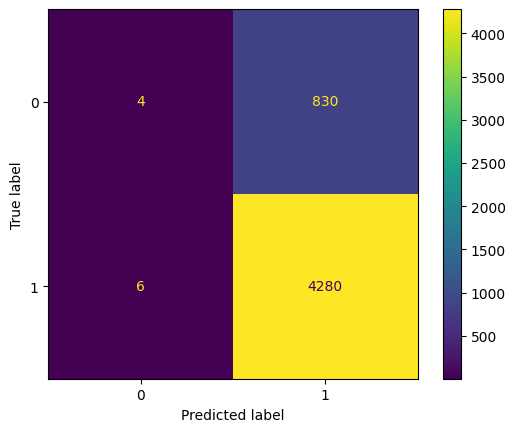

In [35]:
ConfusionMatrixDisplay.from_estimator(lr, X_train, y_train)

This confusion matrix is telling us this model has a bit of difficulty of differentiating some cases between '0' and '1'. There are 6 cases where it predicted '0' while the true value was '1'.

**[6.1.3]** Print the accuracy score of the validation set

In [36]:
lr.score(X_val, y_val)

0.81328125

Even though our model is achieving a good accuracy score of 0.81, it is lower than for the training set. This tells us the model is overfitting.

**[6.1.4]** Print the confusion matrix on the validation set

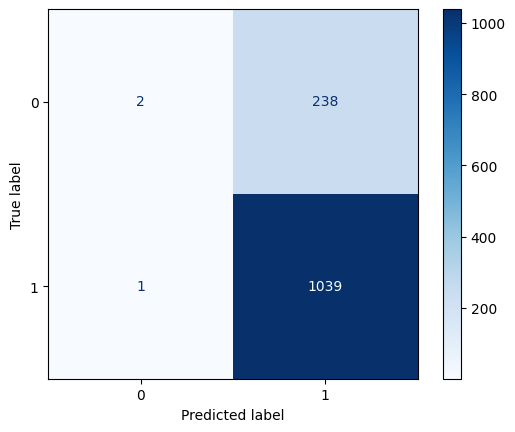

In [37]:
ConfusionMatrixDisplay.from_estimator(lr, X_val, y_val,cmap=plt.cm.Blues)

**[6.1.5]** Let's try to add some weights for each class and reduce overfitting with C Hyperparameter

In [80]:
lr = LogisticRegression(
    solver='liblinear', 
    random_state=42, 
    class_weight='balanced', 
    # C=0.5,
    C=1,
    # C=0.9,
)
lr.fit(X_train, y_train)

LogisticRegression(C=1, class_weight='balanced', random_state=42,
                   solver='liblinear')

In [81]:
print(lr.score(X_train, y_train))
print(lr.score(X_val, y_val))

0.63828125
0.63828125


The accuracy scores decreased for the training and validation sets but they are closer to each other.

With C=1, we got reasonably close accuracy score for the training and validation sets. The model is not overfitting much.

**[6.1.6]** Plot the confusion matrics for the training and validation sets

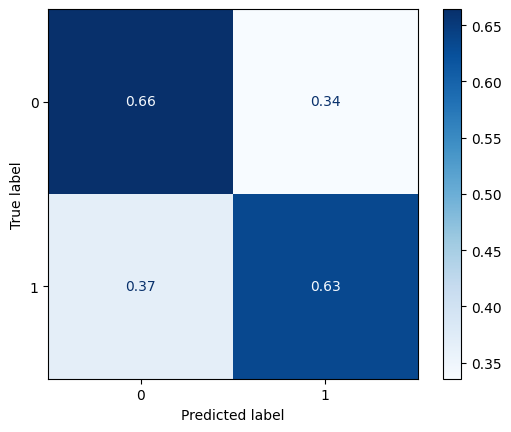

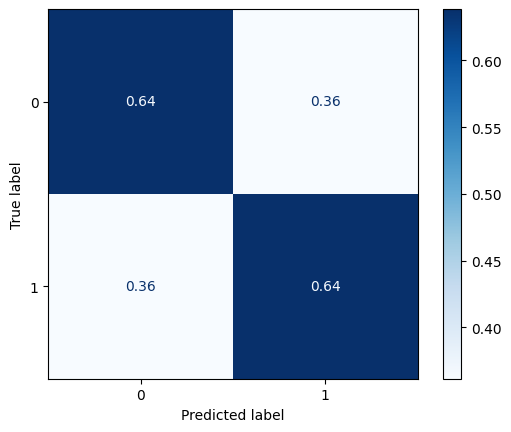

In [82]:
ConfusionMatrixDisplay.from_estimator(lr, X_train, y_train, cmap=plt.cm.Blues, normalize='true')
ConfusionMatrixDisplay.from_estimator(lr, X_val, y_val, cmap=plt.cm.Blues, normalize='true')

The confusion matrices show more similar patterns.

This is our best model so far with the following hyperparameters: C=1. It achieved good performance and it is not overfitting much. Let's confirm this on the testing set.

**[6.1.7]** Print the accuracy score on the testing set

In [83]:
lr.score(X_test, y_test)

0.633125

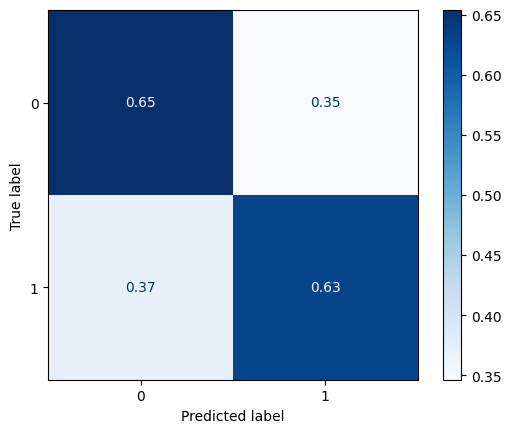

In [84]:
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, cmap=plt.cm.Blues, normalize='true')

The accuracy score for the testing set is very close to the ones achieved on the training and testing sets.

**[6.1.8]** Print the classification reports on the training, testing and validation sets

In [85]:
lr_y_preds_train = lr.predict(X_train)
print(classification_report(y_train, lr_y_preds_train, target_names=['major', 'minor']))

lr_y_preds_test = lr.predict(X_test)
print(classification_report(y_test, lr_y_preds_test, target_names=['major', 'minor']))

lr_y_preds_val = lr.predict(X_val)
print(classification_report(y_val, lr_y_preds_val, target_names=['major', 'minor']))

              precision    recall  f1-score   support

       major       0.26      0.66      0.37       834
       minor       0.91      0.63      0.75      4286

    accuracy                           0.64      5120
   macro avg       0.58      0.65      0.56      5120
weighted avg       0.80      0.64      0.69      5120

              precision    recall  f1-score   support

       major       0.25      0.65      0.36       257
       minor       0.90      0.63      0.74      1343

    accuracy                           0.63      1600
   macro avg       0.58      0.64      0.55      1600
weighted avg       0.80      0.63      0.68      1600

              precision    recall  f1-score   support

       major       0.29      0.64      0.40       240
       minor       0.88      0.64      0.74      1040

    accuracy                           0.64      1280
   macro avg       0.59      0.64      0.57      1280
weighted avg       0.77      0.64      0.68      1280



**[6.1.9]** Predict with test set `NBA_test`

In [86]:
df = df_test.copy()
X_preds_val = df
lr_y_preds_val = lr.predict(X_preds_val)

In [87]:
df["TARGET_5Yrs"] = lr_y_preds_val
df = df[["Id", "TARGET_5Yrs"]]

**[6.1.10]** Save predictions to CSV

In [88]:
df.to_csv(f'../models/lr_{df_test_name}.csv', index=False)

#### 6.2 Train SVC

Instantiate a SVC() mode.

Reduce overfitting with class_weight, min_samples_split, and C Hyperparameter.

In [107]:
svc = SVC(
    class_weight='balanced', 
    # C=0.5,
    C=1,
    # C=0.9,
)
svc.fit(X_train, y_train)

SVC(C=1, class_weight='balanced')

**[6.2.1]** Print the accuracy score of the training and test sets

In [101]:
print("Train:", svc.score(X_train, y_train))
print("Test:", svc.score(X_test, y_test))

Train: 0.4765625
Test: 0.449375


This model does not show good results. It got an accuracy score of 0.48.

**[6.2.2]** Plot the confusion matrics for the training and validation sets

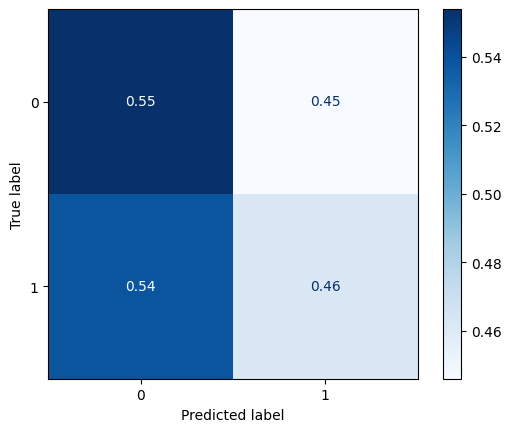

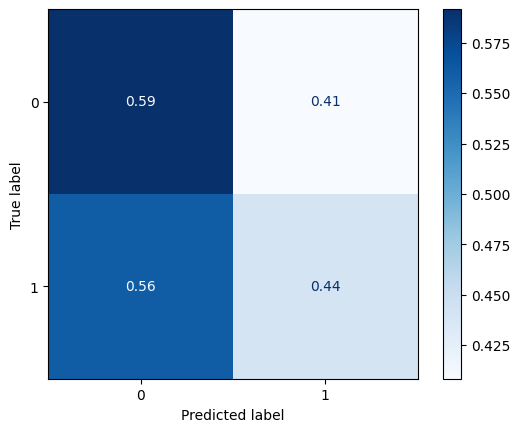

In [102]:
ConfusionMatrixDisplay.from_estimator(svc, X_train, y_train, cmap=plt.cm.Blues, normalize='true')
ConfusionMatrixDisplay.from_estimator(svc, X_val, y_val, cmap=plt.cm.Blues, normalize='true')

SVC does not seem a good choice for performing prediction for our use case.

#### 6.3 Train Decision Tree

Instantiate a DecisionTreeClassifier() model with random_state=8 parameter in order to keep our results consistent.

Reduce overfitting with class_weight, min_samples_split, and max_depth.

In [191]:
tree = DecisionTreeClassifier(
    random_state=8,
    class_weight='balanced',
    # min_samples_split=5,
    min_samples_split=10,
    # min_samples_split=20,
    # min_samples_split=40,
    # max_depth=3,
    max_depth=6,
    # max_depth=8,
)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=10, random_state=8)

**[6.3.1]** Print the accuracy score of the training and test sets

In [192]:
print("Train:", tree.score(X_train, y_train))
print("Test:", tree.score(X_test, y_test))

Train: 0.696484375
Test: 0.651875


This initial model is achieving fair results. It got an accuracy score of 0.70.

**[6.3.2]** Plot the confusion matrics for the training and validation sets

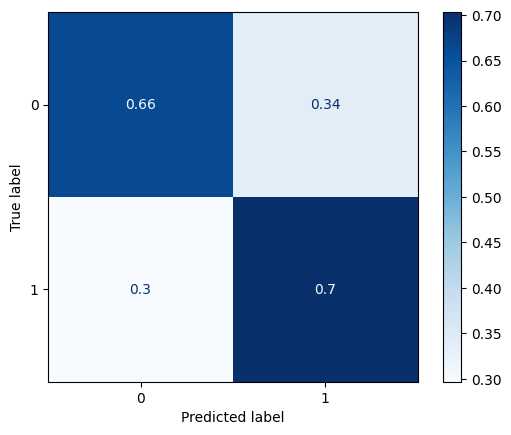

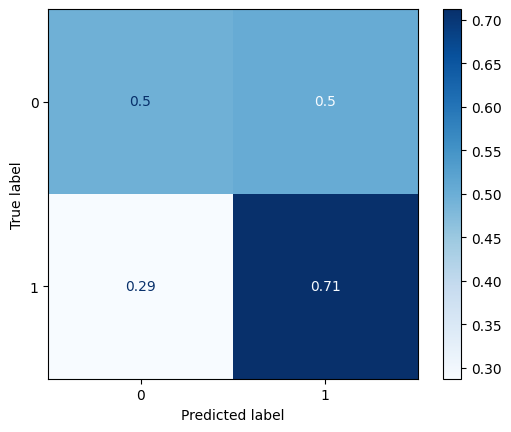

In [193]:
ConfusionMatrixDisplay.from_estimator(tree, X_train, y_train, cmap=plt.cm.Blues, normalize='true')
ConfusionMatrixDisplay.from_estimator(tree, X_val, y_val, cmap=plt.cm.Blues, normalize='true')

**[6.3.3]** Print the accuracy score of the validation set

In [194]:
tree.score(X_val, y_val)

0.671875

**[6.3.4]** Print the confusion matrix on the validation set

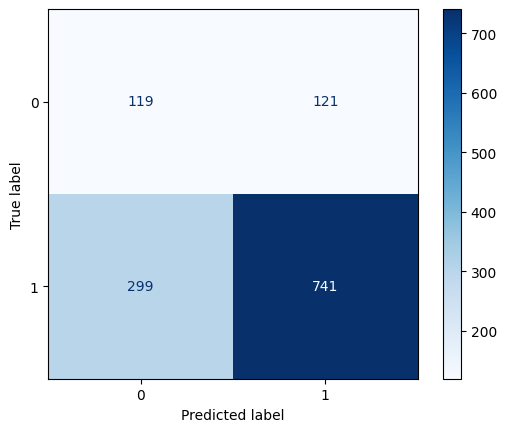

In [195]:
ConfusionMatrixDisplay.from_estimator(tree, X_val, y_val,cmap=plt.cm.Blues)

The model is doing a fair good job but it is still overfitting.

**[6.3.5]** Print the accuracy score of the training and validation sets

In [196]:
print(tree.score(X_train, y_train))
print(tree.score(X_val, y_val))

0.696484375
0.671875


The accuracy scores for the training and validation sets are relatively closer to each other.

**[6.3.6]** Plot the confusion matrics for the training and validation sets

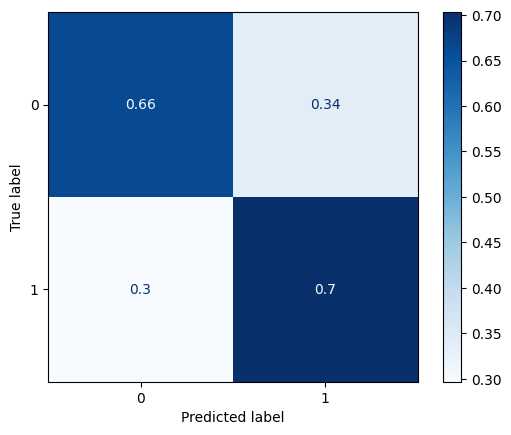

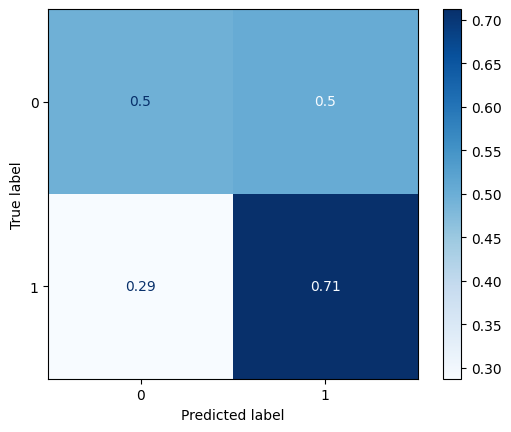

In [197]:
ConfusionMatrixDisplay.from_estimator(tree, X_train, y_train, cmap=plt.cm.Blues, normalize='true')
ConfusionMatrixDisplay.from_estimator(tree, X_val, y_val, cmap=plt.cm.Blues, normalize='true')

The confusion matrices show relatively similar patterns.

The model is quite overfitting and may not yield good results.

**[6.3.7]** Print the accuracy score on the testing set

In [198]:
tree.score(X_test, y_test)

0.651875

**[6.3.8]** Print the confusion matrix on the testing set

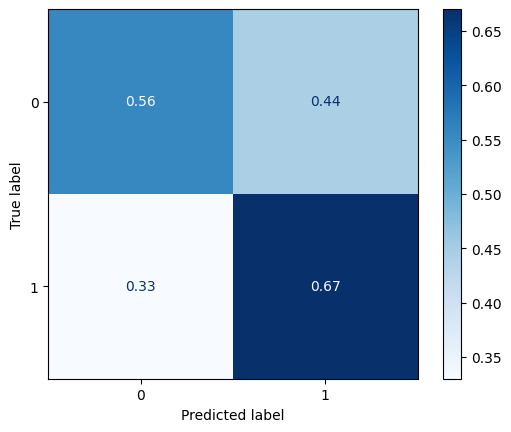

In [199]:
ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test, cmap=plt.cm.Blues, normalize='true')

The accuracy score for the testing set is close to the ones achieved on the training and testing sets.

**[6.3.9]** Print the classification reports on the training, testing and validation sets

In [201]:
tree_y_preds_train = tree.predict(X_train)
print(classification_report(y_train, tree_y_preds_train, target_names=['major', 'minor']))

tree_y_preds_test = tree.predict(X_test)
print(classification_report(y_test, tree_y_preds_test, target_names=['major', 'minor']))

tree_y_preds_val = tree.predict(X_val)
print(classification_report(y_val, tree_y_preds_val, target_names=['major', 'minor']))

              precision    recall  f1-score   support

       major       0.30      0.66      0.42       834
       minor       0.91      0.70      0.80      4286

    accuracy                           0.70      5120
   macro avg       0.61      0.68      0.61      5120
weighted avg       0.81      0.70      0.73      5120

              precision    recall  f1-score   support

       major       0.24      0.56      0.34       257
       minor       0.89      0.67      0.76      1343

    accuracy                           0.65      1600
   macro avg       0.57      0.61      0.55      1600
weighted avg       0.78      0.65      0.70      1600

              precision    recall  f1-score   support

       major       0.28      0.50      0.36       240
       minor       0.86      0.71      0.78      1040

    accuracy                           0.67      1280
   macro avg       0.57      0.60      0.57      1280
weighted avg       0.75      0.67      0.70      1280



**[6.3.10]** Predict with test set `NBA_test`

In [202]:
df = df_test.copy()
X_preds_val = df
tree_y_preds_val = tree.predict(X_preds_val)

In [203]:
df["TARGET_5Yrs"] = tree_y_preds_val
df = df[["Id", "TARGET_5Yrs"]]

**[6.3.11]** Save predictions to CSV

In [204]:
df.to_csv(f'../models/tree_{df_test_name}.csv', index=False)

#### 6.4 Train Random Forest

Instantiate a DecisionTreeClassifier() model.

Reduce overfitting with hyperparameters.

In [210]:
rf = RandomForestClassifier(random_state=8)

**[6.4.1]** Let's create a dictionary containing the grid search parameters

In [211]:
hyperparams_grid = {
    'n_estimators': np.arange(10, 100, 20),
    'max_depth': np.arange(5, 30, 5),
    'min_samples_leaf': np.arange(2, 20, 4)
    }
hyperparams_grid

{'n_estimators': array([10, 30, 50, 70, 90]),
 'max_depth': array([ 5, 10, 15, 20, 25]),
 'min_samples_leaf': array([ 2,  6, 10, 14, 18])}

**[6.4.2]** Instantiate a GridSearchCV with the hyperparameter grid and the random forest model

In [212]:
grid_search_rf = GridSearchCV(rf, hyperparams_grid, cv=2, verbose=1)

**[6.4.3]** Fit the GridSearchCV on the training set

In [213]:
grid_search_rf.fit(X_train, y_train)

Fitting 2 folds for each of 125 candidates, totalling 250 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=8),
             param_grid={'max_depth': array([ 5, 10, 15, 20, 25]),
                         'min_samples_leaf': array([ 2,  6, 10, 14, 18]),
                         'n_estimators': array([10, 30, 50, 70, 90])},
             verbose=1)

**[6.4.3]** Display the best set of hyperparameters

In [214]:
grid_search_rf.best_params_

{'max_depth': np.int64(15),
 'min_samples_leaf': np.int64(14),
 'n_estimators': np.int64(30)}

**[6.4.4]** Print the accuracy score of the training, test, and validation sets

In [224]:
print("Train:", grid_search_rf.score(X_train, y_train))
print("Test:", grid_search_rf.score(X_test, y_test))
print("Validation:", grid_search_rf.score(X_val, y_val))

Train: 0.8453125
Test: 0.8375
Validation: 0.8125


**[6.4.5]** Let's define the hyperparameters value randomly

In [217]:
hyperparams_dist = {
    'n_estimators': randint(10, 100),
    'max_depth': randint(5, 30),
    'min_samples_leaf': randint(2, 20)
}

**[6.4.6]** Instantiate a KFold with 5 splits

In [220]:
kf_cv = KFold(n_splits=5)

**[6.4.7]** Instantiate a RandomizedSearchCV with the hyperparameter values and the random forest model

In [221]:
random_search_rf = RandomizedSearchCV(rf, hyperparams_dist, random_state=8, cv=kf_cv, verbose=1)

**[6.4.8]** Fit the RandomizedSearchCV on the training set

In [222]:
random_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(random_state=8),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x130a94f10>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x12f165a00>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1315b5790>},
                   random_state=8, verbose=1)

**[6.4.8]** Display the best set of hyperparameters

In [223]:
random_search_rf.best_params_

{'max_depth': 26, 'min_samples_leaf': 9, 'n_estimators': 69}

**[6.4.9]** Print the accuracy score of the training, test, and validation sets

In [ ]:
print("Train:", random_search_rf.score(X_train, y_train))
print("Test:", random_search_rf.score(X_test, y_test))
print("Validation:", random_search_rf.score(X_val, y_val))

Train: 0.853125
Test: 0.84125
Validation: 0.809375


The accuracy scores for the training and validation sets are relatively close to each other.

This GridSearchCV model seems to be achieving good results and better validation score than the RandomizedSearchCV model.

We select GridSearchCV as the prediction model.

**[6.4.10]** Plot the confusion matrics for the training and validation sets

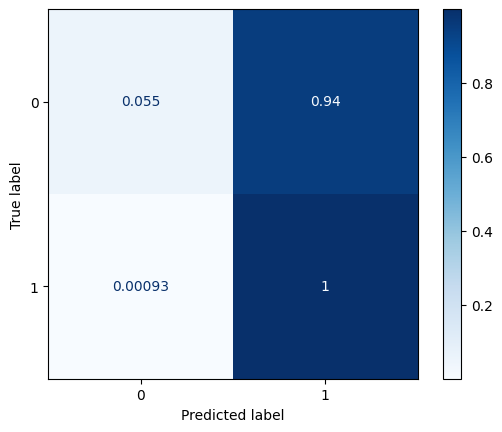

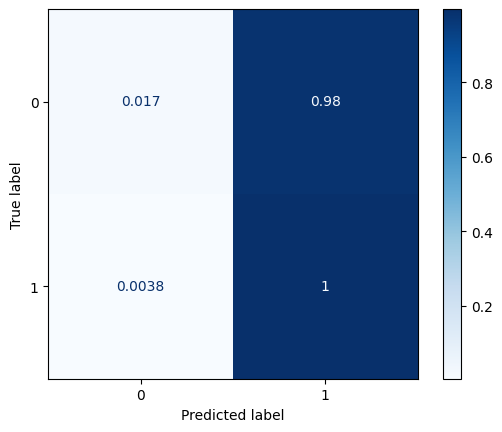

In [229]:
ConfusionMatrixDisplay.from_estimator(grid_search_rf, X_train, y_train, cmap=plt.cm.Blues, normalize='true')
ConfusionMatrixDisplay.from_estimator(grid_search_rf, X_val, y_val, cmap=plt.cm.Blues, normalize='true')

**[6.4.11]** Print the confusion matrix on the validation set

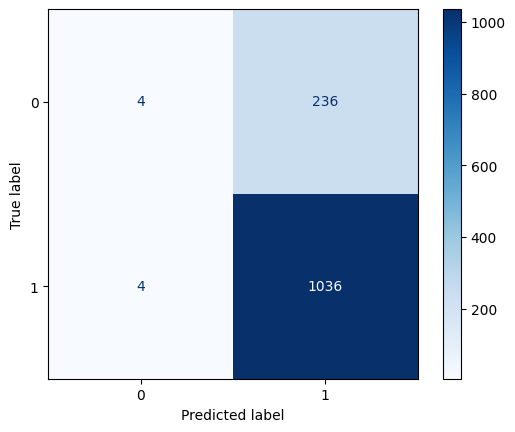

In [230]:
ConfusionMatrixDisplay.from_estimator(grid_search_rf, X_val, y_val,cmap=plt.cm.Blues)

The confusion matrices don't show relatively similar patterns.

The model is well overfitting and may not yield good results.

**[6.4.12]** Print the confusion matrix on the testing set

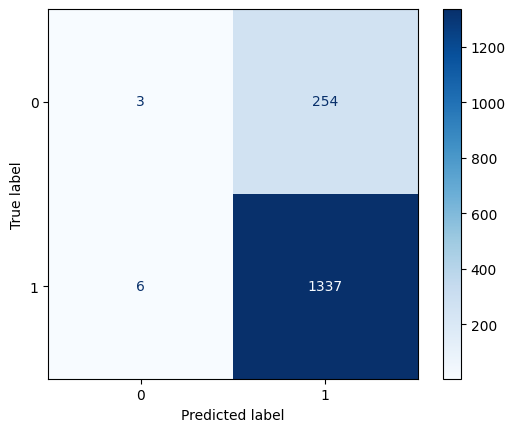

In [232]:
ConfusionMatrixDisplay.from_estimator(grid_search_rf, X_test, y_test, cmap=plt.cm.Blues)

The accuracy score for the testing set is close to the ones achieved on the training and testing sets.

**[6.4.13]** Print the classification reports on the training, testing and validation sets

In [233]:
rf_y_preds_train = grid_search_rf.predict(X_train)
print(classification_report(y_train, rf_y_preds_train, target_names=['major', 'minor']))

rf_y_preds_test = grid_search_rf.predict(X_test)
print(classification_report(y_test, rf_y_preds_test, target_names=['major', 'minor']))

rf_y_preds_val = grid_search_rf.predict(X_val)
print(classification_report(y_val, rf_y_preds_val, target_names=['major', 'minor']))

              precision    recall  f1-score   support

       major       0.92      0.06      0.10       834
       minor       0.84      1.00      0.92      4286

    accuracy                           0.85      5120
   macro avg       0.88      0.53      0.51      5120
weighted avg       0.86      0.85      0.78      5120

              precision    recall  f1-score   support

       major       0.33      0.01      0.02       257
       minor       0.84      1.00      0.91      1343

    accuracy                           0.84      1600
   macro avg       0.59      0.50      0.47      1600
weighted avg       0.76      0.84      0.77      1600

              precision    recall  f1-score   support

       major       0.50      0.02      0.03       240
       minor       0.81      1.00      0.90      1040

    accuracy                           0.81      1280
   macro avg       0.66      0.51      0.46      1280
weighted avg       0.76      0.81      0.73      1280



**[6.4.14]** Predict with test set `NBA_test`

In [234]:
df = df_test.copy()
X_preds_val = df
rf_y_preds_val = grid_search_rf.predict(X_preds_val)

In [235]:
df["TARGET_5Yrs"] = tree_y_preds_val
df = df[["Id", "TARGET_5Yrs"]]

**[6.4.14]** Save predictions to CSV

In [236]:
df.to_csv(f'../models/rf_{df_test_name}.csv', index=False)

### 7.   Push changes

**[7.1]** Add you changes to git staging area

In [ ]:
git add --all

**[7.2]** Create the snapshot of your repository and add a description

In [ ]:
git commit -m "Save predictions"

**[7.3]** Push your snapshot to Github

In [ ]:
git push --set-upstream origin data_prep

**[7.4]** Go to Github and merge the branch after reviewing the code and fixing any conflict


